# Regrid from rotated pole to regular CORDEX domain

In [1]:
import cordex as cx
import xesmf as xe

In [2]:
# bounds are needed for conservative remapping
rotated = cx.cordex_domain("NAM-44", dummy="topo", bounds=True)
regular = cx.cordex_domain("NAM-44i", dummy="topo", bounds=True)

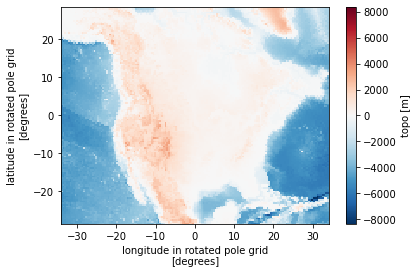

In [3]:
rotated.topo.plot()

In [4]:
regridder = xe.Regridder(rotated, regular, method="bilinear")
regridder

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_130x155_129x300.nc 
Reuse pre-computed weights? False 
Input grid shape:           (130, 155) 
Output grid shape:          (129, 300) 
Periodic in longitude?      False

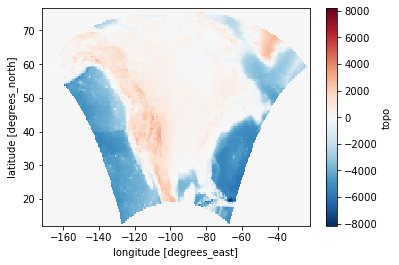

In [5]:
regrid = regridder(rotated)
regrid.topo.plot()

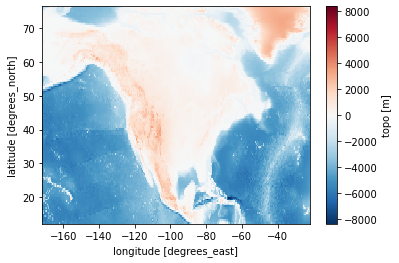

In [6]:
regular.topo.plot()

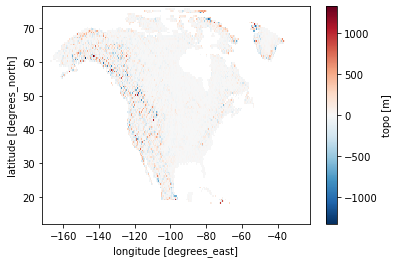

In [7]:
(regular.topo - regrid.topo).where(regrid.topo > 0).plot()